## Modelos 

In [1]:
# Librerias requeridas
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler # Para normalizar de datos

# Actualizar el archivo de funciones
import importlib 
import A_Funciones as funciones # Este archivo contiene las funciones a utilizar
importlib.reload(funciones) # Actualiza los cambios en el archivo de las funciones

# Algoritmos para los modelos 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

from sklearn.preprocessing import StandardScaler # Para normalizar de datos
from sklearn.model_selection import RandomizedSearchCV # Seleccionar mejor modelo
import joblib # Para guardar modelos 
import openpyxl # Para crear archivos .xlsx 

In [2]:
# Cargar los datos de reclamaciones 
df_reclamaciones = joblib.load('Data_final\\df_final_reclamaciones.pkl')

In [3]:
df_reclamaciones

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico
0,18686469,1.0,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1579219,40,61.0,Diagnostico Pendiente
1,18686469,1.0,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,442805,40,61.0,Diagnostico Pendiente
2,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,461626,40,729.0,Diagnostico Pendiente
3,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,593054,40,729.0,Diagnostico Pendiente
4,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,455257,40,729.0,Diagnostico Pendiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781400,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,579721,45,729.0,Pruebas complementarias
3781401,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,479786,45,729.0,Diagnostico Pendiente
3781402,34178573,1.0,Cali,0,0,0,0,0.0,LABORATORIO CLINICO,1,675070,45,729.0,Diagnostico Pendiente
3781403,34178573,1.0,Cali,0,0,0,0,0.0,CONSULTA EXTERNA,2,565193,45,729.0,Diagnostico Pendiente


### Modelo reclamaciones

Este modelo se realiza con el propósito de cumplir uno de los primeros objetivos del reto, que es lograr predecir los costos asociados que tendrán los usuarios respectos a sus seguros en salud a lo largo para así poder tarifar los seguros. 

In [4]:
# Generamos variables dummies
df_reclamaciones = pd.get_dummies(df_reclamaciones, dtype = int)


In [5]:
y = df_reclamaciones.Valor_Pagado
X0 = df_reclamaciones.loc[:,~ df_reclamaciones.columns.isin(['Valor_Pagado','Asegurado_Id'])]

In [6]:
scaler = StandardScaler()
scaler.fit(X0)

X1 = scaler.transform(X0)
X = pd.DataFrame(X1 , columns = X0.columns)
X

,Sexo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Eventos,Edad,Duracion_Poliza_Dias,Ciudad_Barranquilla,...,Clasificacion_Diagnostico_Enfermedades del sistema nervioso,Clasificacion_Diagnostico_Enfermedades digestivas,Clasificacion_Diagnostico_Enfermedades endocrinas,Clasificacion_Diagnostico_Enfermedades respiratorias,Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios),Clasificacion_Diagnostico_Lesiones traumaticas,Clasificacion_Diagnostico_Malformaciones congenitas,Clasificacion_Diagnostico_Neoplasias,Clasificacion_Diagnostico_Pruebas complementarias,Clasificacion_Diagnostico_Trastornos mentales
0,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,0.200468,0.253115,-2.265091,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,-2.265091,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
2,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
3,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
4,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640817,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,10.088100,-0.01212
1640818,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1640819,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1640820,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.081034,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212


### Selección de variables y modelo 

In [7]:
# Modelos puesto a prueba
modelo_random_forest = RandomForestRegressor()
modelo_knn = KNeighborsRegressor()
modelo_xgboost = xgb.XGBRegressor()

modelos = list([modelo_random_forest, modelo_xgboost])

In [8]:
# RFE para la selección de variables para distintos modelos
def funcion_rfe(modelos, X, y, num_variables, paso):
  resultados = {}
  for modelo in modelos: 
    rfemodelo = RFE(modelo, n_features_to_select = num_variables, step = paso)
    fit = rfemodelo.fit(X,y)
    var_names = fit.get_feature_names_out()
    puntaje = fit.ranking_
    diccionario_importancia = {}
    nombre_modelo = modelo.__class__.__name__

    for i,j in zip(var_names,puntaje):
      diccionario_importancia[i] = j
      resultados[nombre_modelo] = diccionario_importancia
  
  return resultados

In [48]:
# Muestra aleatorio de los datos que garantize la reproducibilidad de los datos
X_sample = X.sample(frac = 0.05, random_state = 18)
y_sample = y.sample(frac = 0.05, random_state = 18)

In [10]:
X_sample.shape

(82041, 54)

In [11]:
# Selección de variables por el método de eliminación hacia atrás
df_resultados = pd.DataFrame(funcion_rfe(modelos, X_sample, y_sample, 38, 1))
df_resultados.fillna('No incluída',inplace = True)
df_resultados

C:\Users\jorge\AppData\Local\Temp\ipykernel_21000\4071276435.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No incluída' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resultados.fillna('No incluída',inplace = True)


,RandomForestRegressor,XGBRegressor
Sexo,1.0,1.0
CANCER,1.0,1.0
EPOC,1.0,1.0
DIABETES,1.0,1.0
HIPERTENSION,1.0,1.0
ENF_CARDIOVASCULAR,1.0,1.0
Eventos,1.0,1.0
Edad,1.0,1.0
Duracion_Poliza_Dias,1.0,1.0
Ciudad_Barranquilla,1.0,1.0


In [12]:
# Variable selccionadas
var_names = ['Sexo', 'CANCER','EPOC','DIABETES','HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Eventos', 'Edad', 'Duracion_Poliza_Dias', 'Ciudad_Barranquilla',
             'Ciudad_Bogota','Ciudad_Cali','Ciudad_Cartagena','Ciudad_Medellin','Reclamacion_CONSULTA DE URGENCIAS', 'Reclamacion_CONSULTA EXTERNA',
             'Reclamacion_DIALISIS','Reclamacion_EXAMENES DE DIAGNOSTICO','Reclamacion_FISIOTERAPIA ILIMITADA', 'Reclamacion_LABORATORIO CLINICO',
             'Reclamacion_PAMD', 'Reclamacion_TRATAMIENTO AMBULATORIO POR CANCER', 'Reclamacion_TRATAMIENTOS AMBULATORIOS ESPECIALES',
             'Clasificacion_Diagnostico_Diagnostico Pendiente', 'Clasificacion_Diagnostico_Embarazo, parto y puerperio', 'Clasificacion_Diagnostico_Enfermedades de la piel',
             'Clasificacion_Diagnostico_Enfermedades del aparato circulatorio', 'Clasificacion_Diagnostico_Enfermedades del aparato genitourinario',
             'Clasificacion_Diagnostico_Enfermedades del aparato musculoesqueletico', 'Clasificacion_Diagnostico_Enfermedades del sistema nervioso',
             'Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios)', 'Clasificacion_Diagnostico_Lesiones traumaticas',
             'Clasificacion_Diagnostico_Neoplasias', 'Clasificacion_Diagnostico_Pruebas complementarias']
X_sel = X_sample[var_names]

In [13]:
# Validación del rendimiento de los modelos 
def medir_modelos(modelos, scoring, X, y, cv):

    metric_modelos = pd.DataFrame()
    for modelo in modelos:
        scores = cross_val_score(modelo, X, y, scoring = scoring, cv = cv )
        pdscores = pd.DataFrame(scores)
        metric_modelos = pd.concat([metric_modelos,pdscores], axis = 1)
    
    metric_modelos.columns = ['RandomForestRegressor','XGBRegressor']
    return metric_modelos

In [14]:
# Medimos el desempeño de los modelos para todo el conjunto de datos y para las variables seleccionadas
r2_df = medir_modelos(modelos,'r2', X_sample, y_sample, 5)
display(r2_df)
r2_var_sel = medir_modelos(modelos, 'r2', X_sel, y_sample, 5)
display(r2_var_sel)

,RandomForestRegressor,XGBRegressor
0,0.375397,0.075319
1,0.339856,0.402681
2,-0.916338,-1.055380
3,0.349654,0.326114
4,0.179480,0.200077


,RandomForestRegressor,XGBRegressor
0,0.362785,0.053814
1,0.331529,0.422376
2,-1.131380,-0.897244
3,0.340788,0.306311
4,0.181466,0.215016


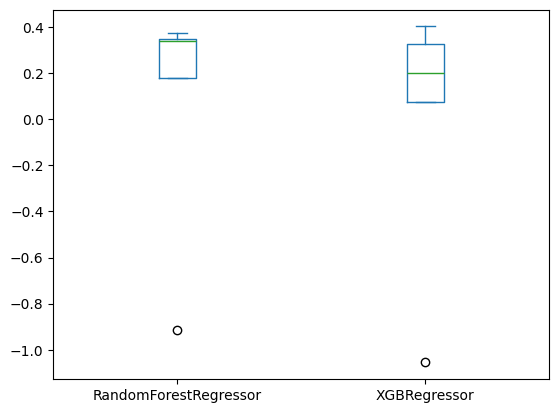

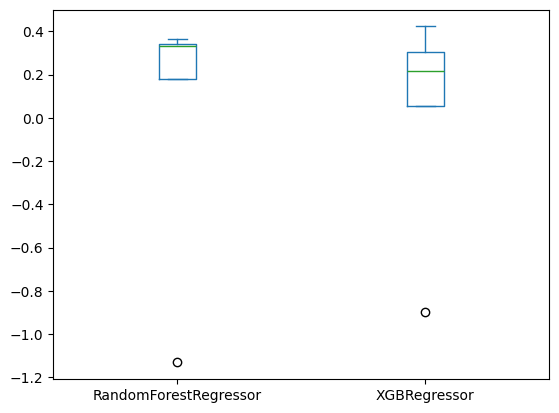

In [15]:
# Comparación entre el desempeño de los modelos con todas las variables y con las seleccionadas
r2_df.plot(kind = 'box');
r2_var_sel.plot(kind = 'box');

### Afinamiento de hiperparámetros

Al observar las gráficas comparativas, observamos que en promedio tiene un mejor desempeño el random forest con el conjunto de variables seleccionadas. Por tanto, se procede a realizar la optimización de hiperparámetros de dicho modelo. 

In [16]:
modelo_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
param_grid = [{'n_estimators': [1,2,5,20,50],
               'max_depth': [8,9,10,12,15,17,25], 
               'min_samples_split':[2, 10, 25, 50,100],
               'min_samples_leaf': [1,2,4,5,10,20,50],
               'max_features':[1,2,3,4,5,50]}]

- **n_estimators**: Es el número de árboles de decisión en el bosque. Un mayor número de árboles puede mejorar el rendimiento, pero también aumenta el tiempo de entrenamiento.
- **max_depth**: La profundidad máxima de los árboles de decisión. Los árboles más profundos pueden capturar patrones más complejos en los datos, pero también son más propensos a sobreajustarse.
- **min_samples_split**: El número mínimo de muestras necesarias para dividir un nodo. Un valor mayor puede evitar el sobreajuste, pero también puede hacer que el modelo sea menos flexible.
-  **min_samples_leaf**: Este hiperparámetro especifica el número mínimo de muestras que deben estar presentes en el nodo hoja después de dividir un nodo.
- **max_features**: El número de características a considerar cuando se busca la mejor división. Un mayor número de características puede conducir a un mejor rendimiento, pero también puede aumentar el tiempo de entrenamiento.

In [18]:
tun_rf = RandomizedSearchCV(modelo_random_forest, param_distributions = param_grid, n_iter = 5, scoring = "r2")
tun_rf.fit(X_sel, y_sample)

pd.set_option('display.max_colwidth', 100)
resultados = tun_rf.cv_results_
tun_rf.best_params_
pd_resultados = pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by = "mean_test_score", ascending = False)

rf_final = tun_rf.best_estimator_
display(rf_final)

display(pd_resultados)

RandomForestRegressor(max_depth=9, max_features=5, min_samples_leaf=2,
                      min_samples_split=25, n_estimators=50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119520,0.009835,0.012504,0.006252,20,100,50,1,10,"{'n_estimators': 20, 'min_samples_split': 100, 'min_samples_leaf': 50, 'max_features': 1, 'max_d...",0.107301,0.043135,0.094080,0.064979,0.055308,0.072961,0.024042,5
1,2.405266,0.025735,0.035506,0.005824,20,25,4,50,15,"{'n_estimators': 20, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 50, 'max_de...",0.337042,0.170616,-0.232166,0.225249,0.159484,0.132045,0.192666,4
2,0.887044,0.013819,0.040228,0.001547,50,25,2,5,9,"{'n_estimators': 50, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 5, 'max_dep...",0.319302,0.175188,0.151370,0.264818,0.173472,0.216830,0.064347,1
3,0.959118,0.021115,0.045989,0.001762,50,25,4,5,10,"{'n_estimators': 50, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 5, 'max_dep...",0.272647,0.163968,0.144119,0.260452,0.155835,0.199404,0.055321,2
4,0.703361,0.011578,0.034680,0.001470,50,25,20,4,9,"{'n_estimators': 50, 'min_samples_split': 25, 'min_samples_leaf': 20, 'max_features': 4, 'max_de...",0.214223,0.118237,0.202475,0.252913,0.125359,0.182641,0.052456,3


In [19]:
# Desempeño del modelo sin optimizar hiperparámetros
eval = cross_validate(modelo_random_forest, X_sel, y_sample, cv = 5, scoring = "r2", return_train_score = True)

train = pd.DataFrame(eval['train_score'])
test = pd.DataFrame(eval['test_score'])
train_test = pd.concat([train, test], axis = 1)
train_test.columns = ['train_score','test_score']

train_test 

,train_score,test_score
0,0.809552,0.400501
1,0.818365,0.350991
2,0.842739,-1.044159
3,0.813210,0.361278
4,0.794200,0.176187


In [20]:
# Desempeño del modelo optimzado hiperparámetros
eval = cross_validate(rf_final, X_sel, y_sample, cv = 5, scoring = "r2", return_train_score = True)

train = pd.DataFrame(eval['train_score'])
test = pd.DataFrame(eval['test_score'])
train_test = pd.concat([train, test], axis = 1)
train_test.columns = ['train_score','test_score']

train_test 


,train_score,test_score
0,0.283476,0.298717
1,0.292525,0.175921
2,0.309786,0.160580
3,0.308295,0.252754
4,0.363390,0.159673


Al evaluar el desempeño del modelo sin la optimización de hiperparámetros, vemos que este tiene buen rendimiento en entrenamiento pero a la hora de realizar el test de los datos cae drásticamente esta métrica, por lo que para este modelo existe sobreajuste en los datos.

**Técnica de regularización Ridge (L2)**

In [21]:
# Entrenar de nuevo el modelo 
rf_final.fit(X_sel, y_sample)

RandomForestRegressor(max_depth=9, max_features=5, min_samples_leaf=2,
                      min_samples_split=25, n_estimators=50)

In [22]:
# Usar SelectFromModel para seleccionar características
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator = rf_final, threshold = "median")
X_selected = selector.fit_transform(X, y)

In [23]:
# Verificar las características seleccionadas
print("Número de características originales:", X_sel.shape[1])
print("Número de características seleccionadas con la regularización:", X_selected.shape[1])

Número de características originales: 34
Número de características seleccionadas con la regularización: 27


In [24]:
# Muestra aleatorio de los datos que garantize la reproducibilidad de los datos
X_sel2 = pd.DataFrame(X_selected)
X_sel2 = X_sel2.sample(frac = 0.05, random_state = 18)

In [25]:
# Desempeño del modelo optimzado hiperparámetros y aplicando la regularización Ridge 
eval = cross_validate(rf_final, X_sel2, y_sample, cv = 5, scoring = "r2", return_train_score = True)

train = pd.DataFrame(eval['train_score'])
test = pd.DataFrame(eval['test_score'])
train_test = pd.concat([train, test], axis = 1)
train_test.columns = ['train_score','test_score']

train_test 

,train_score,test_score
0,0.269148,0.332061
1,0.311319,0.194545
2,0.320164,0.127873
3,0.326025,0.283431
4,0.338603,0.180769


**Análisis de residuales**

In [28]:
# Predicciones del modelo
predictions = cross_val_predict(rf_final, X_sel2, y_sample, cv = 5)
pred_df = pd.DataFrame(predictions, columns = ['pred'])

In [61]:
# Convertimos lo valores reales en un df
y_sample2 = np.array(y_sample)
y_sample2 = pd.DataFrame(y_sample2, columns = ['Real'])

In [62]:
# Df de predicciones y los valores reales
df1 = pd.concat([pred_df, y_sample2],axis=1)

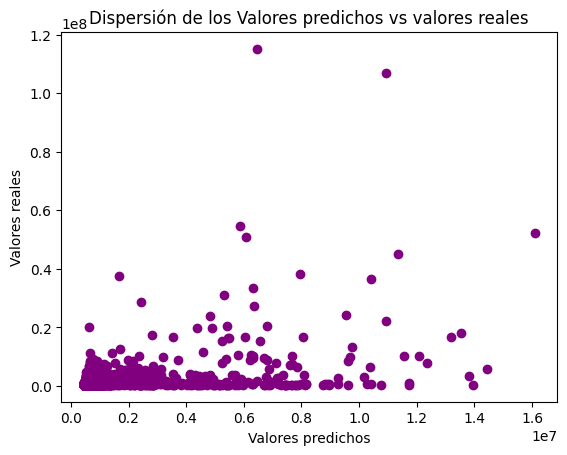

In [63]:
# Diagrama de valores predichos vs valores reales
residuos = df1['Real']- df1['pred']

fig, ax = plt.subplots()
ax.scatter(x = df1['pred'], y = df1['Real'], c = "purple")
plt.title("Dispersión de los Valores predichos vs valores reales")
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()

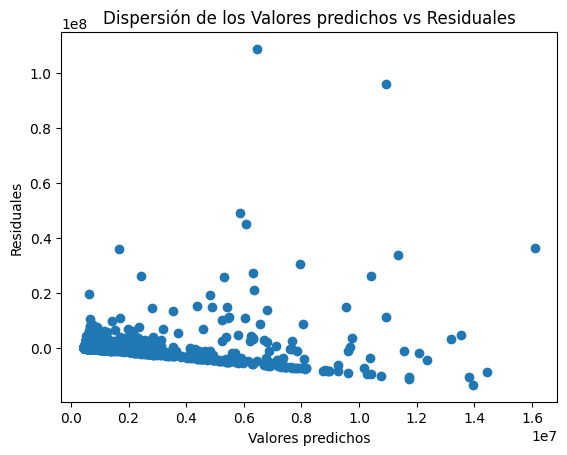

In [59]:
# Diagrama de valores predichos vs residuales
fig, ax = plt.subplots()
ax.scatter(x = df1['pred'], y = residuos)
plt.title("Dispersión de los Valores predichos vs Residuales")
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.show()

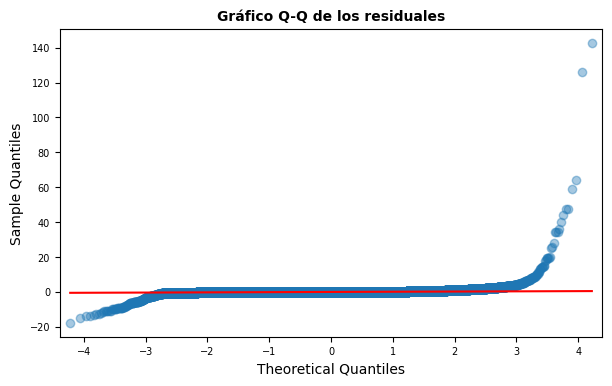

In [64]:
# Diagrama qq
import statsmodels.api as sm
fig, ax = plt.subplots(figsize = (7,4))

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de los residuales', fontsize = 10, fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.show()